# Algoritmo Apriori

El algoritmo apriori asume que si un subgrupo de artículos de un set que presenta cierta frecuencia, es posible asumir que la frecuencia aplica al subgrupo tambien. Ejemplo, si una transacción de tipo frecuente contiene {uvas, mangos, manzanas}, es posible asumir que {mangos, manzanas} tambien será frecuente.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
np.random.seed(3)
uvas=np.random.randint(0,2,100)
manzanas=np.random.randint(0,2,100)
mangos=np.random.randint(0,2,100)
naranjas=np.random.randint(0,2,100)

In [3]:
df=pd.DataFrame({"Grapes":uvas,"Apples":manzanas, "Mango":mangos, "Orange":naranjas})
df.head()

,Grapes,Apples,Mango,Orange
0,0,1,0,1
1,0,0,1,0
2,1,0,1,0
3,1,1,0,0
4,0,1,1,1


**Las reglas de asociación permiten encontrar patrones comunes en los elementos de grandes conjuntos de datos.**

            {Antecedente}--->{Consecuente}

Para obtener el sentido y la fuerza de las reglas de asociación, es necesario calcular diferentes indicadores: Soporte **(Support)**, Confianza **(Confidence)** y La mejora de la confianza **(Lift)**

## Support

El **Support** es la frecuencia relativa con la que se observa la regla. Es decir, un soporte de 0.15 indica que el antecedente y el consecuente se observan a la vez en el 15% de las transacciones. Este indicado mide la fuerza de la regla. Al ser un porcentaje, los posibles valores del soporte se encuentran entre 0 y 1.

In [4]:
def support(DataFrame,columna):
    return DataFrame[columna].sum()/len(DataFrame)

In [5]:
support(df,"Grapes")

0.5

In [6]:
df.Grapes.value_counts()

1    50
0    50
Name: Grapes, dtype: int64

In [7]:
columnas=df.columns.values.tolist()
print("Support:")
print("-"*20)
for columna in columnas:
    print(columna.upper(),support(df,columna))

Support:
--------------------
GRAPES 0.5
APPLES 0.42
MANGO 0.47
ORANGE 0.46


## Confidence

La confianza es el porcentaje de las transacciones en las que aparece el antecedente en la que también aparece el consecuente. Lo que mide este indicador es la fiabilidad de la regla.

$conf_{({A}->{B})}=\frac{Transacciones\ incluyendo\ A,B}{Transacciones\ incluyendo\ solo\ A}$

Supongamos que revisamos los casos en donde al comprar uvas y manzanas, la gente también compro mangos:

            {Grapes, Apples}--->{Mangos}

In [8]:
df_a=df[(df.Grapes==1) & (df.Apples==1)]
len(df_a)

22

In [9]:
df_b=df[(df.Grapes==1)]
len(df_b)

50

In [10]:
22/55

0.4

## Lift

Incremento de la venta de **A** cuando se vende **B**

$lift_{({A}->{B})}=\frac{Confidence_{(A,B)}}{Support_{(B)}}$

In [11]:
0.4/support(df,"Mango")

0.8510638297872342

<table style="width:70%">
  <tr>
    <th>Lift</th>
    <th>Interpretación</th>
  </tr>
  <tr>
    <td>lift igual a 1</td>
    <td>No existe relación entre A y B</td>
  </tr>
  <tr>
    <td>lift menor a 1</td>
    <td>La relación es negativa. No es probable que A y B se compren juntos</td>
  </tr>
  <tr>
    <td>lift mayor a 1</td>
    <td>La relación es positiva. Es probable que A y B se compren juntos</td>
  </tr>
</table>

# MBA

In [27]:
#! pip install mlxtend

In [28]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
import mlxtend as ml

In [29]:
data=pd.read_csv("Datasets/Market_Basket_Optimisation.csv", header=None)
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
articulos=[]
data.applymap(lambda x:x if x in articulos else articulos.append(x))
len(articulos)

121

In [31]:
data.iloc[1,3]

nan

In [32]:
print(data.iloc[1,3] in articulos)

True


In [33]:
articulos.remove(data.iloc[1,3])
len(articulos)

120

In [34]:
zeros=np.zeros([len(data),len(articulos)])
zeros.shape

(7501, 120)

In [35]:
df=pd.DataFrame(zeros, columns=articulos)
df.head()

,shrimp,burgers,chutney,turkey,mineral water,low fat yogurt,whole wheat pasta,soup,frozen vegetables,french fries,...,ketchup,cream,hand protein bar,body spray,oatmeal,zucchini,water spray,tea,napkins,asparagus
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [36]:
for i in range(data.shape[0]):
    for j in range(data.shape[1]):
        columna=data.iloc[i,j]
        if columna in df.columns.values.tolist():
            df.loc[i,columna]=1
df.sum(axis=1)

0       20.0
1        3.0
2        1.0
3        2.0
4        5.0
        ... 
7496     3.0
7497     6.0
7498     1.0
7499     2.0
7500     4.0
Length: 7501, dtype: float64

In [37]:
basket_sets = df.applymap(lambda x:0 if x<=0 else 1)

frequent_itemsets = apriori(basket_sets, min_support=0.001, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

MemoryError: Unable to allocate 32.3 GiB for an array with shape (144434, 4, 7501) and data type int64

In [ ]:
rules

In [ ]:
rules.sort_values('confidence', ascending = False, inplace = True)
rules.head(20)

In [38]:
df=pd.read_csv("Datasets/BreadBasket_DMS.csv")
df

,Date,Time,Transaction,Item
0,2016-10-30,09:58:11,1,Bread
1,2016-10-30,10:05:34,2,Scandinavian
2,2016-10-30,10:05:34,2,Scandinavian
3,2016-10-30,10:07:57,3,Hot chocolate
4,2016-10-30,10:07:57,3,Jam
...,...,...,...,...
21288,2017-04-09,14:32:58,9682,Coffee
21289,2017-04-09,14:32:58,9682,Tea
21290,2017-04-09,14:57:06,9683,Coffee
21291,2017-04-09,14:57:06,9683,Pastry


In [39]:
print("Número de clientes:", df.Transaction.max())

Número de clientes: 9684


In [40]:
df['Item'].value_counts().iloc[:10]

Coffee           5471
Bread            3325
Tea              1435
Cake             1025
Pastry            856
NONE              786
Sandwich          771
Medialuna         616
Hot chocolate     590
Cookies           540
Name: Item, dtype: int64

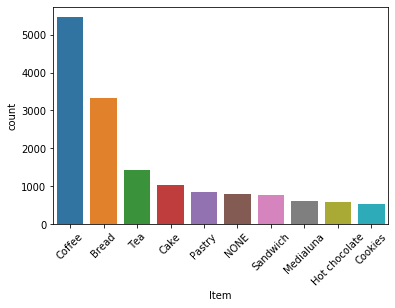

In [41]:
sns.countplot(x = 'Item', data = df, order = df['Item'].value_counts().iloc[:10].index)
plt.xticks(rotation=45)
plt.show()

In [42]:
df=pd.read_csv("Datasets/BreadBasket_DMS.csv")
df.head()

,Date,Time,Transaction,Item
0,2016-10-30,09:58:11,1,Bread
1,2016-10-30,10:05:34,2,Scandinavian
2,2016-10-30,10:05:34,2,Scandinavian
3,2016-10-30,10:07:57,3,Hot chocolate
4,2016-10-30,10:07:57,3,Jam


In [43]:
df_dummies = pd.get_dummies(df["Item"]).drop("NONE", axis=1)
df_concat=pd.concat([df,df_dummies], axis=1)
basket=df_concat.groupby("Transaction").sum()

In [44]:
basket_sets = basket.applymap(lambda x:0 if x<=0 else 1)

frequent_itemsets = apriori(basket_sets, min_support=0.001, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

In [46]:
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
764,"(Salad, Extra Salami or Feta)",(Coffee),0.001679,0.475081,0.001469,0.875000,1.841790,0.000671,4.199349
910,"(Toast, Pastry)",(Coffee),0.001574,0.475081,0.001364,0.866667,1.824249,0.000616,3.936890
776,"(Sandwich, Hearty & Seasonal)",(Coffee),0.001469,0.475081,0.001259,0.857143,1.804202,0.000561,3.674431
654,"(Vegan mincepie, Cake)",(Coffee),0.001259,0.475081,0.001049,0.833333,1.754086,0.000451,3.149512
914,"(Sandwich, Salad)",(Coffee),0.001889,0.475081,0.001574,0.833333,1.754086,0.000677,3.149512
...,...,...,...,...,...,...,...,...,...
655,(Coffee),"(Vegan mincepie, Cake)",0.475081,0.001259,0.001049,0.002208,1.754086,0.000451,1.000952
623,(Coffee),"(Smoothies, Cake)",0.475081,0.001574,0.001049,0.002208,1.403269,0.000302,1.000636
719,(Coffee),"(Sandwich, Chicken Stew)",0.475081,0.001993,0.001049,0.002208,1.107844,0.000102,1.000215
1015,(Coffee),"(Sandwich, Tea, Cake)",0.475081,0.001469,0.001049,0.002208,1.503502,0.000351,1.000741


In [45]:
rules.sort_values('confidence', ascending = False, inplace = True)
rules.head(20)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
764,"(Salad, Extra Salami or Feta)",(Coffee),0.001679,0.475081,0.001469,0.875000,1.841790,0.000671,4.199349
910,"(Toast, Pastry)",(Coffee),0.001574,0.475081,0.001364,0.866667,1.824249,0.000616,3.936890
776,"(Sandwich, Hearty & Seasonal)",(Coffee),0.001469,0.475081,0.001259,0.857143,1.804202,0.000561,3.674431
654,"(Vegan mincepie, Cake)",(Coffee),0.001259,0.475081,0.001049,0.833333,1.754086,0.000451,3.149512
914,"(Sandwich, Salad)",(Coffee),0.001889,0.475081,0.001574,0.833333,1.754086,0.000677,3.149512
121,(Extra Salami or Feta),(Coffee),0.003987,0.475081,0.003253,0.815789,1.717158,0.001358,2.849559
135,(Keeping It Local),(Coffee),0.006610,0.475081,0.005351,0.809524,1.703969,0.002211,2.755823
751,"(Scone, Cookies)",(Coffee),0.001993,0.475081,0.001574,0.789474,1.661765,0.000627,2.493364
839,"(Juice, Pastry)",(Coffee),0.002308,0.475081,0.001784,0.772727,1.626516,0.000687,2.309642
604,"(Salad, Cake)",(Coffee),0.001364,0.475081,0.001049,0.769231,1.619156,0.000401,2.274648


In [79]:
rules[rules.consequents!={'Coffee'}].head(20)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
403,"(Jammie Dodgers, Cake)",(Bread),0.003043,0.324940,0.001574,0.517241,1.591807,0.000585,1.398339
41,(Eggs),(Bread),0.002938,0.324940,0.001469,0.500000,1.538747,0.000514,1.350121
958,"(Coke, Juice)",(Sandwich),0.002203,0.071346,0.001049,0.476190,6.674370,0.000892,1.772885
763,"(Coffee, Extra Salami or Feta)",(Salad),0.003253,0.010387,0.001469,0.451613,43.478006,0.001435,1.804588
369,"(Cookies, Alfajores)",(Juice),0.002413,0.038296,0.001049,0.434783,11.353186,0.000957,1.701476
712,"(Soup, Cake)",(Tea),0.004407,0.141643,0.001889,0.428571,3.025714,0.001264,1.502125
189,(Extra Salami or Feta),(Salad),0.003987,0.010387,0.001679,0.421053,40.535885,0.001637,1.709331
492,"(Jammie Dodgers, Tea)",(Bread),0.002518,0.324940,0.001049,0.416667,1.282289,0.000231,1.157246
488,"(Scone, Hot chocolate)",(Bread),0.002938,0.324940,0.001154,0.392857,1.209016,0.000200,1.111864
706,"(Scone, Cake)",(Tea),0.004721,0.141643,0.001784,0.377778,2.667111,0.001115,1.379502
